# Pandas practice

In [1]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from copy import copy
import os
import sys
import pandas as pd 

In [2]:
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 
import imu_accel as imu_accel

## Use pandas to read IMU csv files and apply function to find metrics

Datasets such as AQUALOC has .csv files where all values are bundled into one columm can however use pandas to make a dataframe and access data from there.

In [3]:
import tkinter as tk
from tkinter import filedialog

def select_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    return file_path
def select_dir():
    root = tk.Tk()
    root.withdraw()
    dir_path = filedialog.askdirectory()
    return dir_path

In [4]:
csv = select_file()

In [5]:
df = pd.read_csv(csv, sep=',')
df

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1523957607423815604,0.002354,-0.060318,-0.031183,-1.995957,-9.463480,0.143400
1,1523957607428940456,0.007283,-0.053654,-0.032247,-1.938725,-9.533963,-0.015993
2,1523957607433975619,0.003686,-0.052452,-0.029315,-1.993572,-9.566855,-0.182775
3,1523957607439089657,0.008882,-0.036465,-0.028515,-1.926802,-9.573903,0.338518
4,1523957607444240499,0.003952,-0.045655,-0.028247,-2.041265,-9.456432,0.228030
...,...,...,...,...,...,...,...
45854,1523957836821870208,0.014557,-0.032625,-0.106722,-1.087403,-9.703122,-0.134797
45855,1523957836826991962,0.008561,-0.041683,-0.106983,-1.015863,-9.541011,-0.173637
45856,1523957836831959046,0.009759,-0.037018,-0.106178,-1.173251,-9.909871,0.058770
45857,1523957836837149254,0.012557,-0.047677,-0.107510,-0.856091,-9.684326,-0.388398


<AxesSubplot:>

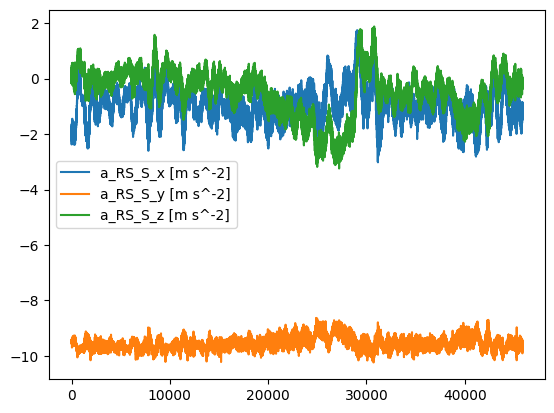

In [6]:
# df_a = df[["a_RS_S_x [m s^-2]", "a_RS_S_y [m s^-2]", "a_RS_S_z [m s^-2]"]]
df_a = df.iloc[:,4:7]
df_m = df.iloc[:,1:4]
df_a.plot.line()

In [7]:
# Can also possibly find largest delta in acceleration?
diff_a = df_a.diff()
diff_a.max()

a_RS_S_x [m s^-2]    1.864801
a_RS_S_y [m s^-2]    1.083085
a_RS_S_z [m s^-2]    1.060220
dtype: float64

In [8]:
# can also try and find average acceleration
df_a.mean()

a_RS_S_x [m s^-2]   -0.979300
a_RS_S_y [m s^-2]   -9.549879
a_RS_S_z [m s^-2]   -0.514714
dtype: float64

In [9]:
# can also try and find variance
df_a.var()

a_RS_S_x [m s^-2]    0.343627
a_RS_S_y [m s^-2]    0.043757
a_RS_S_z [m s^-2]    0.692649
dtype: float64

## Try on AQUALOC harbor 04
The above sequence is harbor 01 from aqualoc that sequence does not have any collisions, this is to try and see if any of the above can be sensetive to tell the reader something about sudden collisions of platform.

In [10]:
csv_harbor_04 = select_file()

In [11]:
harbor_04 = pd.read_csv(csv_harbor_04)
harbor_04_a = harbor_04.iloc[:,4:7]

<AxesSubplot:>

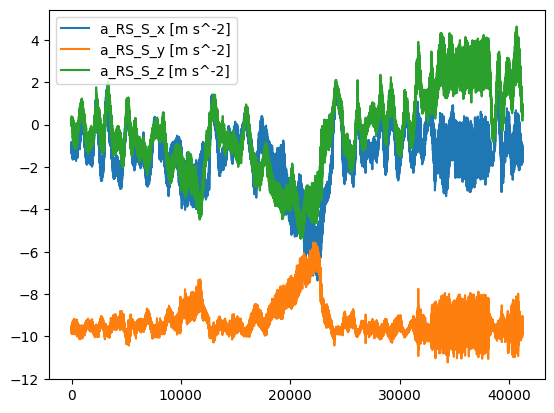

In [12]:
# do line plot of acceleration:
harbor_04_a.plot.line()

Interestingly both of these sequences score really low on the motion blur metric, will try and test on sequence 6 using local written code to extract this information.

In [13]:
csv_harbor_06 = select_file()

# Local code for extracting imu statistics
While looking at plots of imu it could also be useful to try and have proper tables to describe sequences. Here we have AQUALOC harbor sequences 1-4-6 where noted by AQUALOC sequence 4 is marked as having "collisions".

,a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
Largest difference,1.864801,1.083085,1.060220
Mean,-0.979300,-9.549879,-0.514714
Var,0.343627,0.043757,0.692649


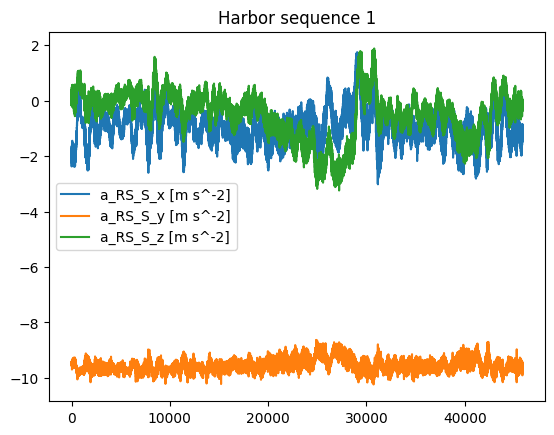

In [16]:
imu_accel.create_aqualoc_imu_dataframe(csv=csv, title = "Harbor sequence 1")

,a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
Largest difference,3.598419,3.171723,2.470712
Mean,-1.454325,-9.241778,-0.295687
Var,1.907901,0.583073,3.787839


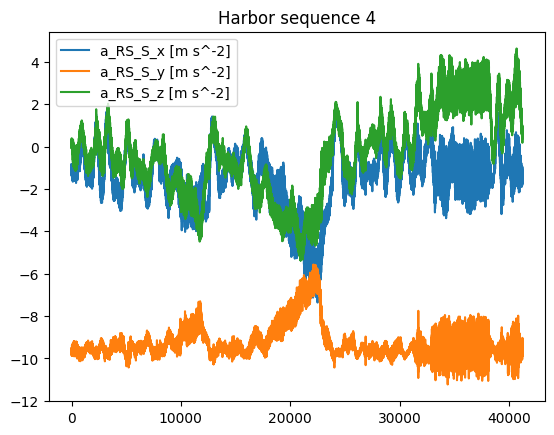

In [17]:
imu_accel.create_aqualoc_imu_dataframe(csv=csv_harbor_04, title = "Harbor sequence 4")

,a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
Largest difference,1.997869,2.025204,1.419895
Mean,-0.943430,-9.631791,0.006070
Var,0.363685,0.028872,0.244116


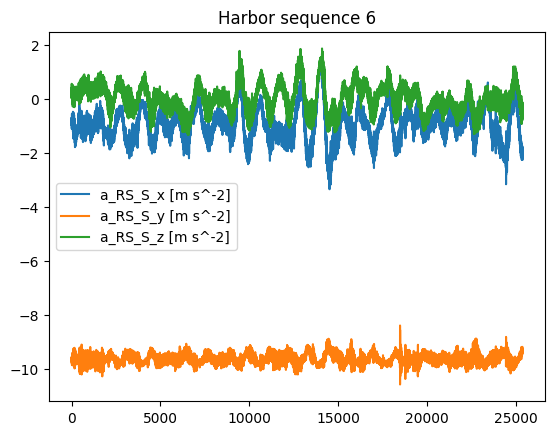

In [18]:
imu_accel.create_aqualoc_imu_dataframe(csv=csv_harbor_06, title = "Harbor sequence 6")